Source https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

下载数据

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

/Users/kevin/.pyenv/versions/3.12.2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:08<00:00, 1216502.89it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 244986.82it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2781646.71it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2554717.55it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Matplotlib is building the font cache; this may take a moment.


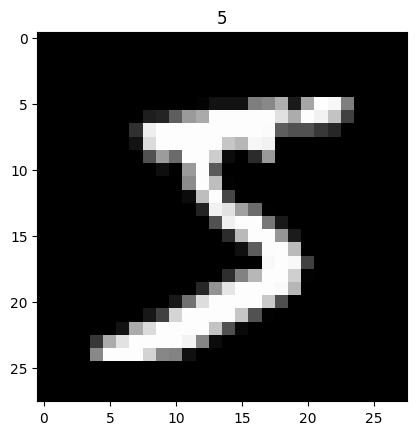

In [2]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [3]:
from torch.utils.data import DataLoader
import torch
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x168ff0200>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x16ccb0140>}

In [4]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [5]:
model = CNN()
model

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [6]:
from torch import optim
optimiser = optim.Adam(model.parameters(), lr = 0.01)   
optimiser

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [7]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

## 训练

In [8]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, model, loaders):
    model.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = model(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimiser.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimiser.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        
        pass
    pass


In [10]:
train(num_epochs, model, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1151
Epoch [1/10], Step [200/600], Loss: 0.0965
Epoch [1/10], Step [300/600], Loss: 0.1192
Epoch [1/10], Step [400/600], Loss: 0.0670
Epoch [1/10], Step [500/600], Loss: 0.0435
Epoch [1/10], Step [600/600], Loss: 0.1435
Epoch [2/10], Step [100/600], Loss: 0.0387
Epoch [2/10], Step [200/600], Loss: 0.0919
Epoch [2/10], Step [300/600], Loss: 0.1272
Epoch [2/10], Step [400/600], Loss: 0.1365
Epoch [2/10], Step [500/600], Loss: 0.0106
Epoch [2/10], Step [600/600], Loss: 0.1197
Epoch [3/10], Step [100/600], Loss: 0.0393
Epoch [3/10], Step [200/600], Loss: 0.0267
Epoch [3/10], Step [300/600], Loss: 0.0762
Epoch [3/10], Step [400/600], Loss: 0.0792
Epoch [3/10], Step [500/600], Loss: 0.1124
Epoch [3/10], Step [600/600], Loss: 0.0499
Epoch [4/10], Step [100/600], Loss: 0.1454
Epoch [4/10], Step [200/600], Loss: 0.0628
Epoch [4/10], Step [300/600], Loss: 0.0345
Epoch [4/10], Step [400/600], Loss: 0.0484
Epoch [4/10], Step [500/600], Loss: 0.0102
Epoch [4/10

## Test

In [11]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

actual_number = lbls[:10].numpy()
actual_number

array([4, 4, 5, 8, 2, 6, 4, 7, 0, 5])

In [13]:
test_output, last_layer = model(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [4 4 5 8 2 6 4 7 0 5]
Actual number: [4 4 5 8 2 6 4 7 0 5]
